# Star Wars Survey

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**

To do this, they surveyed *Star Wars* fans using the online tool SurveyMonkey. They received 835 total responses, which can be downloaded [here](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

For this project, we will be cleaning and exploring the data set in Jupyter notebook. The data has several columns, including:

* RespondentID - An anonymized ID for the respondent (person taking the survey)
* Gender - The respondent's gender
* Age - The respondent's age
* Household Income - The respondent's income
* Education - The respondent's education level
* Location (Census Region) - The respondent's location
* Have you seen any of the 6 films in the Star Wars franchise? - Has a Yes or No response
* Do you consider yourself to be a fan of the Star Wars film franchise? - Has a Yes or No response

There are several other columns containing answers to questions about the *Star Wars* movies and for some questions, the respondent had to check one or more boxes, resulting in a dataset that needs a lot of cleaning.

First, we will need to remove the invalid rows. For example, 'RespondentID' is supposed to be a unique ID for each respondent, but it's blank in some rows. We will remove the rows with an invalid ID.

In [1]:
import pandas as pd

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [2]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]
star_wars['RespondentID'].value_counts()

3.291092e+09    1
3.290345e+09    1
3.290351e+09    1
3.288558e+09    1
3.290360e+09    1
3.290365e+09    1
3.290372e+09    1
3.290375e+09    1
3.290380e+09    1
3.290387e+09    1
3.290399e+09    1
3.291392e+09    1
3.290402e+09    1
3.290409e+09    1
3.290412e+09    1
3.290418e+09    1
3.290423e+09    1
3.290347e+09    1
3.290409e+09    1
3.289920e+09    1
3.290337e+09    1
3.290266e+09    1
3.290407e+09    1
3.290280e+09    1
3.290662e+09    1
3.290287e+09    1
3.290289e+09    1
3.290296e+09    1
3.290298e+09    1
3.290305e+09    1
               ..
3.288591e+09    1
3.290655e+09    1
3.292719e+09    1
3.289446e+09    1
3.292731e+09    1
3.290597e+09    1
3.289532e+09    1
3.291023e+09    1
3.292765e+09    1
3.289986e+09    1
3.289598e+09    1
3.290651e+09    1
3.292664e+09    1
3.292654e+09    1
3.292581e+09    1
3.289553e+09    1
3.289726e+09    1
3.288640e+09    1
3.292565e+09    1
3.290639e+09    1
3.292573e+09    1
3.292583e+09    1
3.292640e+09    1
3.292587e+09    1
3.292597e+

## Cleaning and Mapping 'yes-no' Columns

The next two columns represent Yes/No questions. They can also be Nan where a respondent chooses not to answer a question. Both columns are currently string types, but we can make the data a bit easier to analyze down the road by converting each column to a Boolean having only the values True, False, and NaN.

In [3]:
yes_no = { 'Yes': True, 'No': False}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna =False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [4]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars[
    'Do you consider yourself to be a fan of the Star Wars film franchise?'
].map(yes_no)

star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

## Cleaning and Mapping Checkbox Columns

The next six columns represent a single checkbox question. For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. For our purposes, we'll assume they didn't see the movie.

In [5]:
import numpy as np

#convert each column to a boolean, then rename the column to something more intuitive
movie_mapping = {"Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True  
}


for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

In [6]:
star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
        })

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning the Ranking Columns

The next six columns ask the respondent to rank the movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite.

Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:

* Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. - How much the respondent liked Star Wars: Episode I The Phantom Menace
* Unnamed: 10 - How much the respondent liked Star Wars: Episode II Attack of the Clones
* Unnamed: 11 - How much the respondent liked Star Wars: Episode III Revenge of the Sith
* Unnamed: 12 - How much the respondent liked Star Wars: Episode IV A New Hope
* Unnamed: 13 - How much the respondent liked Star Wars: Episode V The Empire Strikes Back
* Unnamed: 14 - How much the respondent liked Star Wars: Episode VI Return of the Jedi

Fortunately, these columns don't require a lot of cleanup. 

In [7]:
# we will need to convert each column to numeric type, then rename
star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [8]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)


## Finding the Highest-Ranked Movie

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

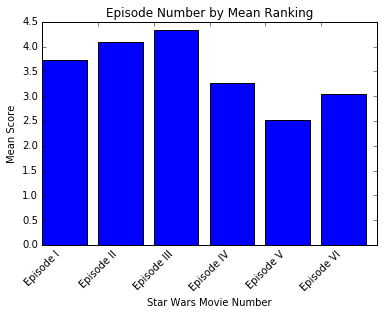

In [10]:
fig, ax = plt.subplots()
plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean())
ax.set_xlabel('Star Wars Movie Number')
ax.set_ylabel('Mean Score')
ax.set_xticklabels(('Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI'))
plt.xticks(rotation=45)
plt.title('Episode Number by Mean Ranking')
plt.show()

Remember that the mean score is reflective of what order the movie is in terms of a fan's favorite. Therefore, a lower score on the bar chart indicates that the movie was seen more favorably than one with a higher mean score.

As expected, the "original" episodes are ranked higher than the prequels.

## The Most Viewed Movie

In [11]:
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

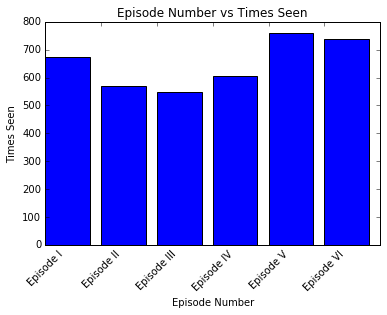

In [12]:
%matplotlib inline

fig, ax = plt.subplots()
plt.bar(range(6), star_wars[star_wars.columns[3:9]].sum())
ax.set_xlabel('Episode Number')
ax.set_ylabel('Times Seen')
ax.set_xticklabels(('Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI'))
plt.xticks(rotation=45)
plt.title('Episode Number vs Times Seen')
plt.show()

The original movies also were seen more than the originals. Episode I's high view count is likely due to it being the attempt to revive the *Star Wars* franchise.

## Exploring the Data by Binary Segments

We know which movies the survey population as a whole has ranked the highest, but now let's look at how certain segments of the population responded. We can look at two groups:

* *Star Wars* fans vs non-fans
* Male vs female

In [13]:
males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']

fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True ]
non_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]

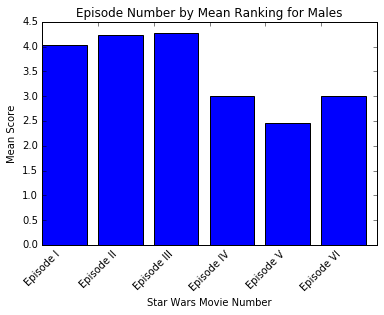

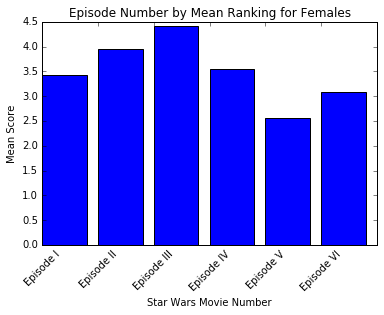

In [14]:
#highest ranking by gender
fig, ax = plt.subplots()
plt.bar(range(6), males[males.columns[9:15]].mean())
ax.set_xlabel('Star Wars Movie Number')
ax.set_ylabel('Mean Score')
ax.set_xticklabels(('Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI'))
plt.xticks(rotation=45)
plt.title('Episode Number by Mean Ranking for Males')
plt.show()

fig, ax = plt.subplots()
plt.bar(range(6), females[females.columns[9:15]].mean())
ax.set_xlabel('Star Wars Movie Number')
ax.set_ylabel('Mean Score')
ax.set_xticklabels(('Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI'))
plt.xticks(rotation=45)
plt.title('Episode Number by Mean Ranking for Females')
plt.show()

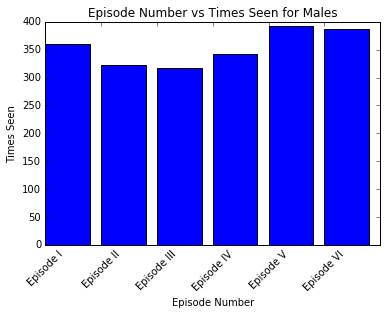

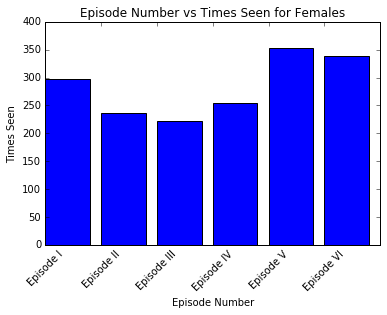

In [15]:
# most viewed by gender
fig, ax = plt.subplots()
plt.bar(range(6), males[males.columns[3:9]].sum())
ax.set_xlabel('Episode Number')
ax.set_ylabel('Times Seen')
ax.set_xticklabels(('Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI'))
plt.xticks(rotation=45)
plt.title('Episode Number vs Times Seen for Males')
plt.show()

fig, ax = plt.subplots()
plt.bar(range(6), females[females.columns[3:9]].sum())
ax.set_xlabel('Episode Number')
ax.set_ylabel('Times Seen')
ax.set_xticklabels(('Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI'))
plt.xticks(rotation=45)
plt.title('Episode Number vs Times Seen for Females')
plt.show()

## Gender Differences in Movies Seen and Favorites

Interestingly, more males watches episodes 1-3, but males liked them far less than females did.

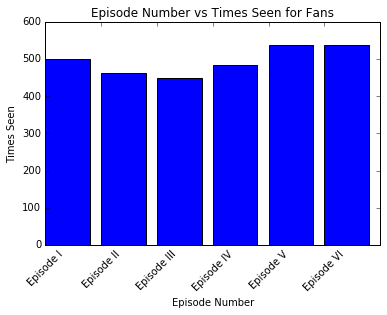

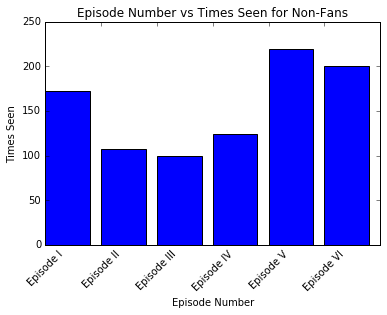

In [16]:
# most viewed by fans
fig, ax = plt.subplots()
plt.bar(range(6), fans[fans.columns[3:9]].sum())
ax.set_xlabel('Episode Number')
ax.set_ylabel('Times Seen')
ax.set_xticklabels(('Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI'))
plt.xticks(rotation=45)
plt.title('Episode Number vs Times Seen for Fans')
plt.show()

fig, ax = plt.subplots()
plt.bar(range(6), non_fans[non_fans.columns[3:9]].sum())
ax.set_xlabel('Episode Number')
ax.set_ylabel('Times Seen')
ax.set_xticklabels(('Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI'))
plt.xticks(rotation=45)
plt.title('Episode Number vs Times Seen for Non-Fans')
plt.show()

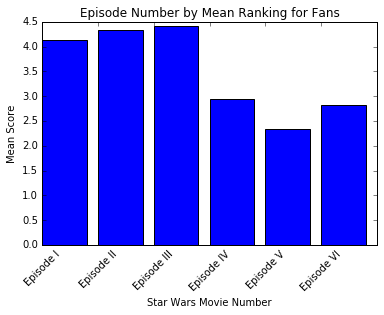

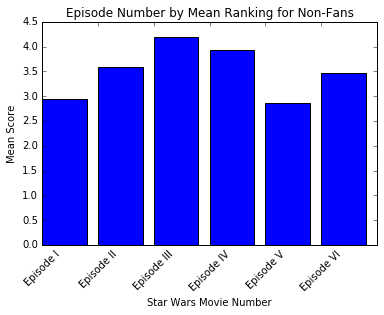

In [17]:
#highest ranking by fans
fig, ax = plt.subplots()
plt.bar(range(6), fans[fans.columns[9:15]].mean())
ax.set_xlabel('Star Wars Movie Number')
ax.set_ylabel('Mean Score')
ax.set_xticklabels(('Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI'))
plt.xticks(rotation=45)
plt.title('Episode Number by Mean Ranking for Fans')
plt.show()

fig, ax = plt.subplots()
plt.bar(range(6), non_fans[non_fans.columns[9:15]].mean())
ax.set_xlabel('Star Wars Movie Number')
ax.set_ylabel('Mean Score')
ax.set_xticklabels(('Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI'))
plt.xticks(rotation=45)
plt.title('Episode Number by Mean Ranking for Non-Fans')
plt.show()

## Fan vs. Non-Fan Differences

To no surprise, survey respondents identifying themselves as 'Fans' saw all the movies around the same number of times, whereas 'non-fans' showed higher watch rates of Episodes I, V, and VI. Fans strongly show their favorite movies as being the original episodes (IV, V, and VI), while 'non-fans' have a better ranking for Episodes I, V, and VI (likely due to the higher number of times seen data).